In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [15]:
df = pd.read_csv('../data/final_test.csv')
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [16]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  str    
dtypes: float64(2), int64(1), str(1)
memory usage: 3.7 MB


In [17]:
df.describe()

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [18]:
df['size'].value_counts()

size
M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: count, dtype: int64

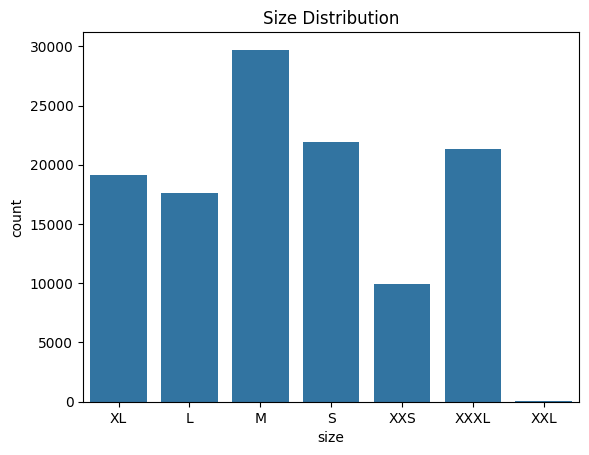

In [19]:
sns.countplot(x='size', data=df)
plt.title('Size Distribution')
plt.show()

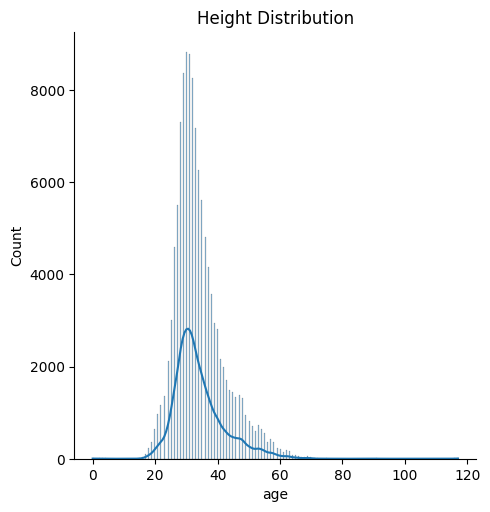

In [20]:
sns.displot(df['age'], kde=True)
plt.title('Height Distribution')
plt.show()

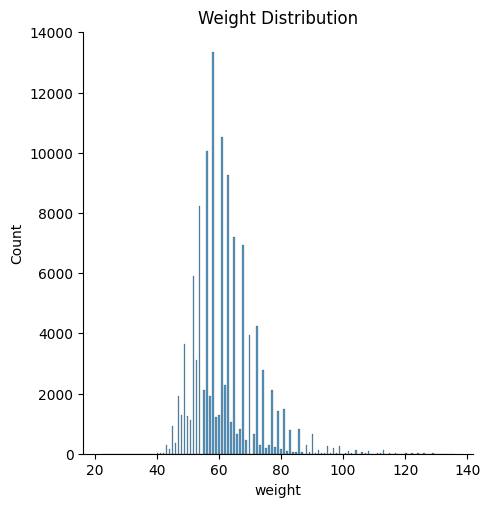

In [21]:
sns.displot(df['weight'])
plt.title('Weight Distribution')
plt.show()

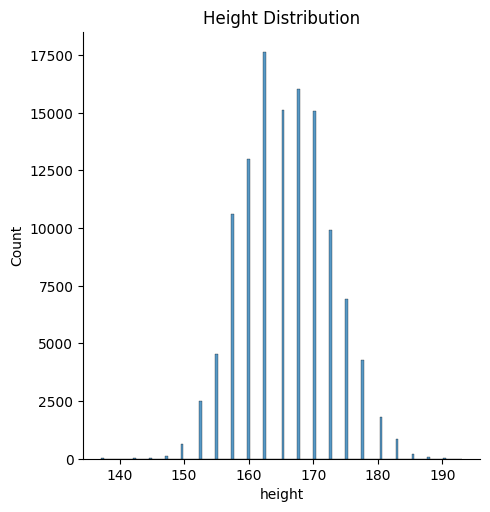

In [22]:
sns.displot(df['height'])
plt.title('Height Distribution')
plt.show()

In [23]:
dfs = []
sizes = []
for size_type in df["size"].unique():
    sizes.append(size_type)
    ndf = df[['age', 'height', 'weight']][df['size'] == size_type]
    zscore = ((ndf - ndf.mean()) / ndf.std())
    dfs.append(zscore)
    
for i in range (len(dfs)):
    dfs[i]['age'] = dfs[i]['age'][(dfs[i]['age'] > -3) & (dfs[i]['age'] < 3)]
    dfs[i]['height'] = dfs[i]['height'][(dfs[i]['height'] > -3) & (dfs[i]['height'] < 3)]
    dfs[i]['weight'] = dfs[i]['weight'][(dfs[i]['weight'] > -3) & (dfs[i]['weight'] < 3)]
    
for i in range(len(sizes)):
    dfs[i]['size'] = sizes[i]
df = pd.concat(dfs)
df.head()

,age,height,weight,size
0,-0.833326,0.767729,-0.660757,XL
24,-0.713290,1.539527,1.556338,XL
25,-0.353183,-1.161765,-0.291241,XL
28,-0.473219,-1.933562,-1.399788,XL
34,0.126960,-0.775866,0.447791,XL


In [24]:
df.isna().sum()

age       1678
height     547
weight    1069
size         0
dtype: int64

In [25]:
df['age'] = df['age'].fillna(df['age'].median())
df['height'] = df['height'].fillna(df['height'].median())
df['weight'] = df['weight'].fillna(df['weight'].median())

In [26]:
df['size'] = df['size'].map({"XXS":1,
                             "S":2,
                             "M":3,
                             "L":4,
                             "XL":5,
                             "XXL":6,
                             "XXXL":7})

In [27]:
df.isna().sum()

age       0
height    0
weight    0
size      0
dtype: int64

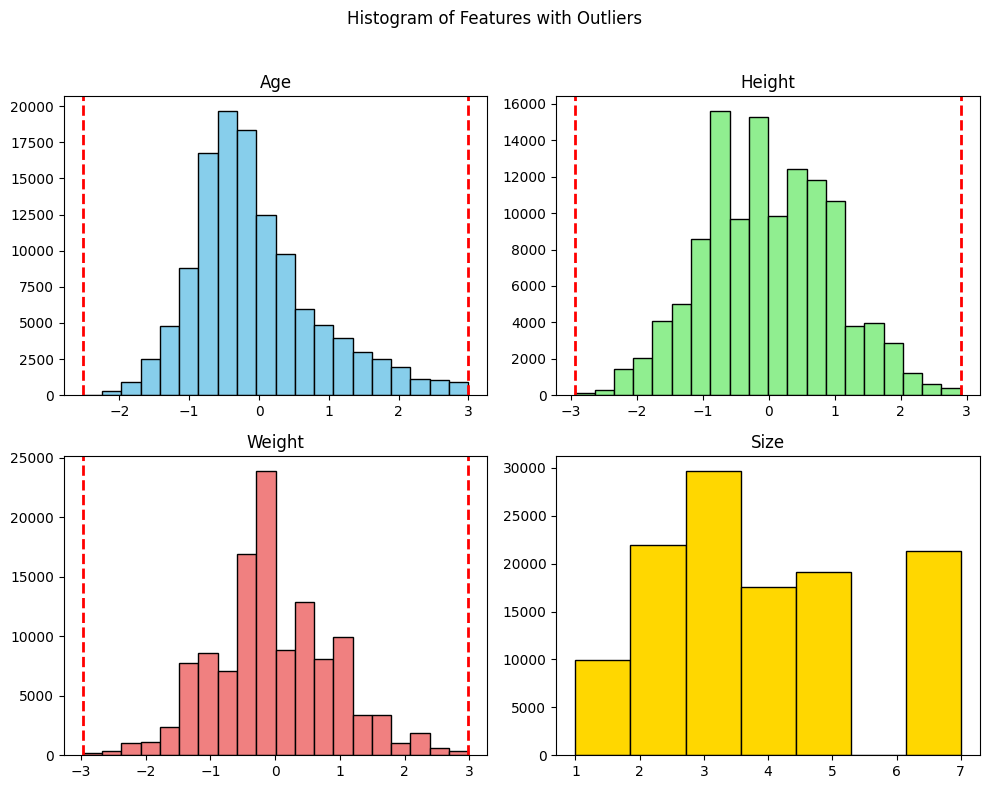

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)  
    Q3 = np.percentile(data, 75)  
    IQR = Q3 - Q1                 
    lower_bound = Q1 - 1.5 * IQR   
    upper_bound = Q3 + 1.5 * IQR   
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

outliers_age = detect_outliers_iqr(df['age'])
outliers_height = detect_outliers_iqr(df['height'])
outliers_weight = detect_outliers_iqr(df['weight'])
outliers_size = detect_outliers_iqr(df['size'])

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Histogram of Features with Outliers')

# Age
axes[0, 0].hist(df['age'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age')
axes[0, 0].axvline(outliers_age.min(), color='red', linestyle='dashed', linewidth=2)
axes[0, 0].axvline(outliers_age.max(), color='red', linestyle='dashed', linewidth=2)

# Height
axes[0, 1].hist(df['height'], bins=20, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Height')
axes[0, 1].axvline(outliers_height.min(), color='red', linestyle='dashed', linewidth=2)
axes[0, 1].axvline(outliers_height.max(), color='red', linestyle='dashed', linewidth=2)

# Weight
axes[1, 0].hist(df['weight'], bins=20, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Weight')
axes[1, 0].axvline(outliers_weight.min(), color='red', linestyle='dashed', linewidth=2)
axes[1, 0].axvline(outliers_weight.max(), color='red', linestyle='dashed', linewidth=2)

# Size
axes[1, 1].hist(df['size'], bins=7, color='gold', edgecolor='black')
axes[1, 1].set_title('Size')

# Menampilkan plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [29]:
df.head()

,age,height,weight,size
0,-0.833326,0.767729,-0.660757,5
24,-0.713290,1.539527,1.556338,5
25,-0.353183,-1.161765,-0.291241,5
28,-0.473219,-1.933562,-1.399788,5
34,0.126960,-0.775866,0.447791,5


In [30]:
# Feature engineering
# df['bmi'] = df['height'] / df['weight']
# df['weight_squared'] = df['weight'] * df['weight']

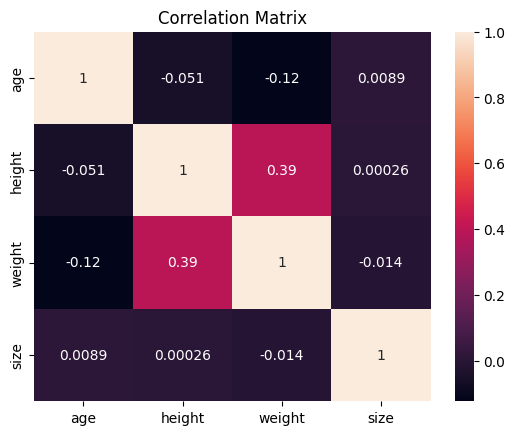

In [31]:
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

In [32]:
# Prepare features and target
X = df.drop('size', axis=1)
y = df['size']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures: {X.columns.tolist()}")

Features shape: (119734, 3)
Target shape: (119734,)

Features: ['age', 'height', 'weight']


In [33]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 95787
Test set size: 23947


In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

print(classification_report(y_test, y_pred))
 
print(confusion_matrix(y_test, y_pred))

Accuracy: 89.68%
              precision    recall  f1-score   support

           1       0.88      0.87      0.87      2050
           2       0.90      0.92      0.91      4394
           3       0.86      0.97      0.91      5903
           4       0.94      0.85      0.89      3504
           5       0.92      0.86      0.89      3794
           6       0.00      0.00      0.00        16
           7       0.91      0.86      0.88      4286

    accuracy                           0.90     23947
   macro avg       0.77      0.76      0.77     23947
weighted avg       0.90      0.90      0.90     23947

[[1784   45   96   47   37    0   41]
 [  11 4038  225   79   12    0   29]
 [  69   17 5705   19   18    1   74]
 [ 112  174  152 2983   28    0   55]
 [  27   94  216   16 3268    0  173]
 [   1    3    3    1    0    0    8]
 [  31  100  255   27  176    0 3697]]


In [40]:
# Save MLP model
import joblib
joblib.dump(mlp, '../models/mlp_model.pkl')

['../models/mlp_model.pkl']

In [34]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Inisialisasi dan melatih model Decision Tree
dt_model = DecisionTreeClassifier()

# Melakukan training
dt_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = dt_model.predict(X_test)

# Matriks kebingungan (confusion matrix)
print('\nConfusion Matrix:')
print(confusion_matrix(y_test,y_pred))

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print('\nAccuracy: {:.2f}%'.format(accuracy * 100))

# Laporan klasifikasi
print('\nClassification Report:')
print(classification_report(y_test,y_pred))


Confusion Matrix:
[[2048    1    0    0    0    0    1]
 [   0 4391    0    0    0    0    3]
 [   0    0 5901    0    0    0    2]
 [   0    0    0 3504    0    0    0]
 [   0    0    0    0 3794    0    0]
 [   0    0    0    0    0   13    3]
 [   0    0    0    2    0    0 4284]]

Accuracy: 99.95%

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2050
           2       1.00      1.00      1.00      4394
           3       1.00      1.00      1.00      5903
           4       1.00      1.00      1.00      3504
           5       1.00      1.00      1.00      3794
           6       1.00      0.81      0.90        16
           7       1.00      1.00      1.00      4286

    accuracy                           1.00     23947
   macro avg       1.00      0.97      0.98     23947
weighted avg       1.00      1.00      1.00     23947



In [41]:
# Save Decision Tree model
joblib.dump(dt_model, '../models/decision_tree_model.pkl')

['../models/decision_tree_model.pkl']

## Tensorflow

In [36]:
# Feature engineering
df['bmi'] = df['height'] / df['weight']
df['weight_squared'] = df['weight'] * df['weight']

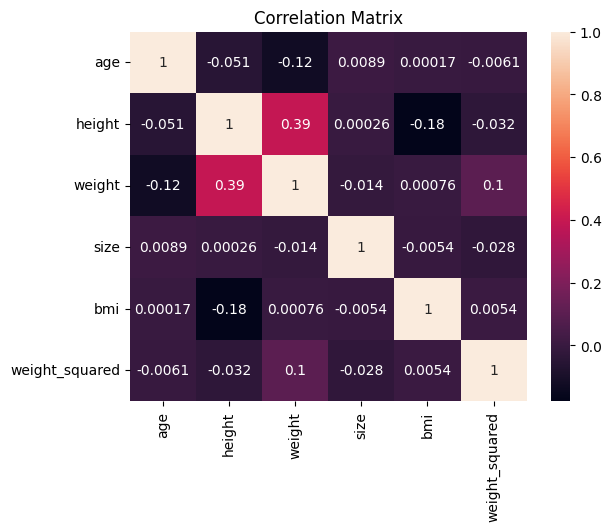

In [37]:
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

In [38]:
X = df.drop('size', axis=1)
y = df['size']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures: {X.columns.tolist()}")

Features shape: (119734, 5)
Target shape: (119734,)

Features: ['age', 'height', 'weight', 'bmi', 'weight_squared']


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 95787
Test set size: 23947


In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

# Ensure y_train is zero-based (e.g., starts from 0)
y_train_adjusted = y_train - y_train.min()  # Adjust labels to start from 0
y_test_adjusted = y_test - y_test.min()

# Get the number of unique classes after adjustment
num_classes = len(np.unique(y_train_adjusted))

# One-hot encode y_train and y_test
y_train_one_hot = to_categorical(y_train_adjusted, num_classes)
y_test_one_hot = to_categorical(y_test_adjusted, num_classes)

# Ubah model dengan menambahkan Batch Normalization
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Step 7: Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 8: Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Step 9: Train the model
history = model.fit(X_train, y_train_one_hot, epochs=100, batch_size=64, validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])

# Step 10: Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test_one_hot)
print(f"Test accuracy: {test_acc}")

# Step 11: Make predictions
predictions = model.predict(X_test)  # Corrected this line by closing the parenthesis
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_one_hot, axis=1)

# Step 12: Accuracy score
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Prediction accuracy: {accuracy}")

In [ ]:
# Save TensorFlow model
model.save('../models/tensorflow_size_model.keras')
print("TensorFlow model saved successfully!")